In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sps

In [3]:
df_data = pd.read_csv("../Data/preprocessed_alcoholdata_balance.csv")
# display(df_data)
df_data.shape

(1232, 23)

In [4]:
chars = ["array([[2]], dtype=uint8", "array", "\n", "[", "]", "(", ")"]

def string_to_ndarray(sd):
    for char in chars:
        sd = sd.replace(char, "")

    sd = sd.replace("   ", " ")
    sd = sd[:-2]

    sd_lst = sd.split(" ")
    sd_lst = [float(i) for i in sd_lst]

    sd_arr = np.asarray(sd_lst)
    sd_arr = np.split(sd_arr, len(sd_arr)/3)
    
    return np.asarray(sd_arr)

#### Use first ID to check possibilities in finding peaks and distances

In [27]:
i = 6
title_fontsize = 26
axes_fontsize = 22

In [28]:
sd_norm = string_to_ndarray(df_data["SegmentData"][i])
sd_bril = string_to_ndarray(df_data["SegmentData"][i + 616])

In [29]:
n_peaks, n_dict = sps.find_peaks(sd_norm[:,1], height=(None,0))
n_xs = [sd_norm[:,2][peak] for peak in n_peaks]
n_ys = list(n_dict.values())[0]

b_peaks, b_dict = sps.find_peaks(sd_bril[:,1], height=(None,0))
b_xs = [sd_bril[:,2][peak] for peak in b_peaks]
b_ys = list(b_dict.values())[0]

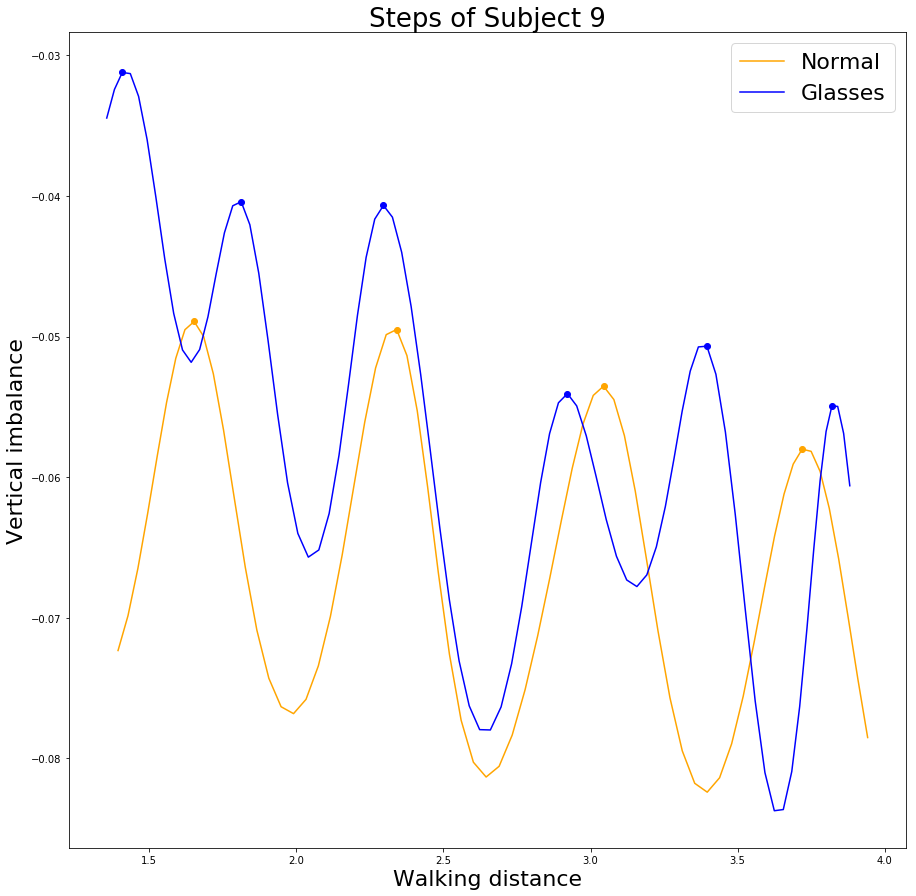

In [39]:
plt.figure(figsize=(15, 15))
title = 'Steps of Subject ' + str(df_data["SubjectID"][i])
plt.title(title, fontsize=title_fontsize)
plt.plot(sd_norm[:,2], sd_norm[:,1], label="Normal", color='orange')
plt.plot(sd_bril[:,2], sd_bril[:,1], label="Glasses", color='blue')
plt.scatter(n_xs, n_ys, color='orange')
plt.scatter(b_xs, b_ys, color='blue')
plt.xlabel("Walking distance", fontsize=axes_fontsize)
plt.ylabel("Vertical imbalance", fontsize=axes_fontsize)
plt.legend(fontsize=axes_fontsize)
plt.savefig('steplength_oneperson.png')
plt.show()

In [20]:
n_dis = np.mean(np.diff(n_xs))
b_dis = np.mean(np.diff(b_xs))
print(n_dis, b_dis)

0.6890988033333333 0.48253635799999994


#### For all

In [21]:
def distance(sd_arr):
    peaks, _ = sps.find_peaks(sd_arr[:,1], height=(None,0))
    xs = [sd_arr[:,2][peak] for peak in peaks]
    return np.absolute(np.mean(np.diff(xs)))


In [22]:
distances = []
for i in range(0, 1232): # 1232 incl alcohol, 720 ex alcohol
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    dis = distance(sd_arr)
    distances.append(dis)
    
col = pd.Series(distances)
df_data["mean_StepLength"] = col.values

In [24]:
display(df_data)
df_data.to_csv(path_or_buf="../Data/preprocessed_alcoholdata_balance.csv", index=False)

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Alcohol,Height,Weight,Age,...,Balance_MLstdev,Balance_MLmeanVelocity,Balance_APrange,Balance_APstdev',Balance_APmeanVelocity,Balance_MeanVelocity,GaitVelocity,MovementVelocity,mad_SegmentData,mean_StepLength
0,006A01',norm,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,0.00,177,70.0,20,...,2.753424,3.233032,8.955034,2.367358,2.674099,4.725911,1.130575,1.133883,0.048709,0.610128
1,006A01',norm,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,0.00,177,70.0,20,...,2.753424,3.233032,8.955034,2.367358,2.674099,4.725911,1.237257,1.246712,0.031206,0.681944
2,006A01',norm,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,0.00,177,70.0,20,...,2.753424,3.233032,8.955034,2.367358,2.674099,4.725911,1.274628,1.286475,0.022252,0.713798
3,006A01',norm,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,0.00,177,70.0,20,...,2.753424,3.233032,8.955034,2.367358,2.674099,4.725911,1.060707,1.082892,0.060879,0.651639
4,009A01',norm,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,0.00,195,86.0,23,...,2.611063,4.441906,5.751258,1.077709,1.763952,5.022392,1.093219,1.107944,0.025316,0.768314
5,009A01',norm,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,0.00,195,86.0,23,...,2.611063,4.441906,5.751258,1.077709,1.763952,5.022392,1.136413,1.138623,0.024061,0.685495
6,009A01',norm,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,0.00,195,86.0,23,...,2.611063,4.441906,5.751258,1.077709,1.763952,5.022392,1.107233,1.112921,0.015080,0.689099
7,009A01',norm,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,0.00,195,86.0,23,...,2.611063,4.441906,5.751258,1.077709,1.763952,5.022392,1.123102,1.124893,0.013693,0.660362
8,010A01',norm,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,0.00,165,65.0,28,...,2.647560,3.597897,3.566472,0.860375,1.478939,4.189830,0.962063,0.970962,0.056155,0.538055
9,010A01',norm,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,0.00,165,65.0,28,...,2.647560,3.597897,3.566472,0.860375,1.478939,4.189830,0.811524,0.824569,0.021438,0.571604


#### Results

['Unnamed: 0.1', 'TestID', 'Conditie', 'SubjectID', 'SegmentNr', 'WalkingDirection', 'SegmentData', 'Height', 'Weight', 'Age', 'BMI', 'std_SegmentData', 'Som_afstand', 'AverageStepLength', 'Color']


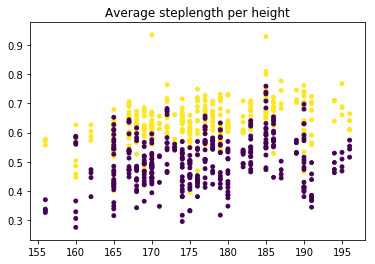

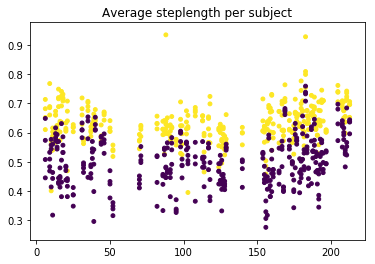

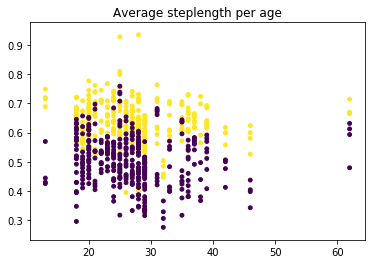

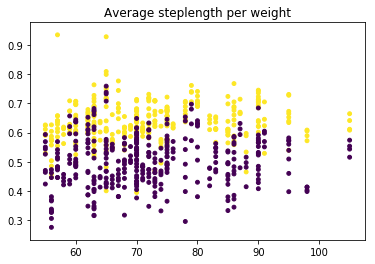

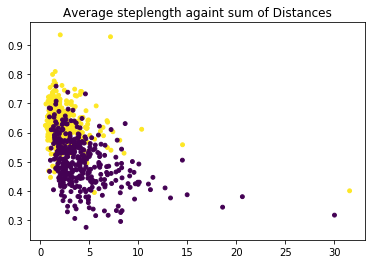

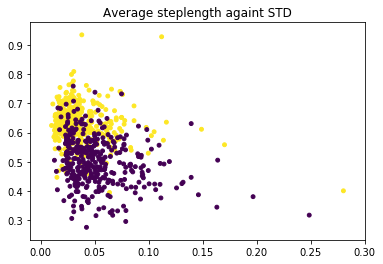

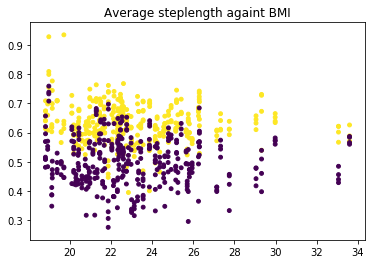

In [176]:
print(list(df_data))

categories = np.unique(df_data["Conditie"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))

df_data["Color"] = df_data["Conditie"].apply(lambda x: colordict[x])
plt.scatter(df_data["Height"], df_data["AverageStepLength"], c=df_data.Color, s=15)
plt.title("Average steplength per height")
plt.show()

df_data["Color"] = df_data["Conditie"].apply(lambda x: colordict[x])
plt.scatter(df_data["SubjectID"], df_data["AverageStepLength"], c=df_data.Color, s=15)
plt.title("Average steplength per subject")
plt.show()

plt.scatter(df_data["Age"], df_data["AverageStepLength"], c=df_data.Color, s=15)
plt.title("Average steplength per age")
plt.show()

plt.scatter(df_data["Weight"], df_data["AverageStepLength"], c=df_data.Color, s=15)
plt.title("Average steplength per weight")
plt.show()

plt.scatter(df_data["Som_afstand"], df_data["AverageStepLength"], c=df_data.Color, s=15)
plt.title("Average steplength againt sum of Distances")
plt.show()

plt.scatter(df_data["std_SegmentData"], df_data["AverageStepLength"], c=df_data.Color, s=15)
plt.title("Average steplength againt STD")
plt.show()

plt.scatter(df_data["BMI"], df_data["AverageStepLength"], c=df_data.Color, s=15)
plt.title("Average steplength againt BMI")
plt.show()